In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab as pl
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.dummy import DummyClassifier

In [3]:
df = pd.read_csv('track_data.csv', index_col=0)

df.drop_duplicates(subset=['Track IDs'], keep='first', inplace=True)

df['Moods'] = (df['Moods'] != 'sad').astype(int)

df.head()

,Artists,Moods,Names,Preview URLs,Track IDs,Instrumentalness,Modality,Speechiness,Energy,Tempo,Valence,Loudness
0,Lauv,0,"fuck, i'm lonely (with Anne-Marie) - from “13 ...",https://p.scdn.co/mp3-preview/f516b7ef3c83e390...,322tcqPhma7F6hfCeLisx0,0.000000,1,0.0683,0.558,95.016,0.678,-6.460
1,Sabrina Carpenter,0,In My Bed,NaN,2o0KMNhcw5KO7CuslvR4Xs,0.002290,0,0.0950,0.385,109.046,0.666,-6.024
2,Bea Miller,0,feel something,https://p.scdn.co/mp3-preview/82b929ed0adcbb9a...,7JDWhC422Gtk1Bq0mL3OTC,0.000156,1,0.0707,0.415,136.029,0.156,-8.914
3,Carly Rae Jepsen,0,Favourite Colour,https://p.scdn.co/mp3-preview/1ff4b4b52fe3f888...,17mS1Cr70SD2PTOTnqL3LT,0.000005,1,0.0519,0.658,146.007,0.677,-5.386
4,MUNA,0,Who,https://p.scdn.co/mp3-preview/d83fd740dfcd06d9...,0qTBo7ExHHGI7RLCk3CwDS,0.000272,0,0.0514,0.667,150.093,0.219,-5.770


In [4]:
df.Moods.value_counts()

1    934
0    702
Name: Moods, dtype: int64

In [5]:
X = df.iloc[:, 5:]
y = df.iloc[:, 1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [6]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb.score(X_test, y_test)

0.8079268292682927

In [7]:
nb.theta_

array([[ 4.61219337e-02,  7.42451155e-01,  5.25083481e-02,
         4.26477620e-01,  1.18388000e+02,  3.05191652e-01,
        -9.69431972e+00],
       [ 7.09659221e-02,  7.24832215e-01,  6.37240268e-02,
         6.86891275e-01,  1.18709632e+02,  5.67479060e-01,
        -6.61795839e+00]])

In [8]:
np.sqrt(nb.sigma_)

array([[ 0.15303137,  0.43728498,  0.04922258,  0.22454733, 28.95884575,
         0.17939049,  4.17270833],
       [ 0.19638183,  0.44659959,  0.05809692,  0.1592993 , 24.98232903,
         0.23021067,  2.33732515]])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


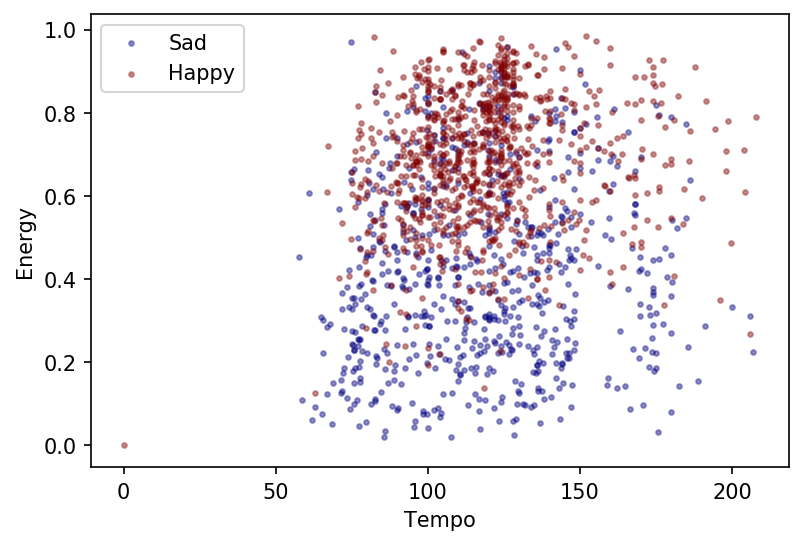

In [9]:
def scatter_plot_data(data):
    plt.figure(dpi=150)
    for ix, label in enumerate(['Sad','Happy']):
        new_df = df[df['Moods']==ix]
        plt.scatter(new_df['Tempo'], new_df['Energy'],c=plt.cm.jet(ix/0.5), alpha=0.4, label=label, s=5)
    plt.xlabel("Tempo")
    plt.ylabel("Energy")
    plt.legend(loc="upper left");

scatter_plot_data(df)